In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
!pip install tensorflow

In [8]:
df = pd.read_csv('LAPD_Crime_Data.csv') 

print(df.head())
print(df.info())
print(df.columns)

print(df.isnull().sum())

print(df.describe())


       DR_NO           Date_Reported            Date_occured  Time_occured  \
0  190326475           03/01/20 0:00           03/01/20 0:00          2130   
1  200106753           02/09/20 0:00           02/08/20 0:00          1800   
2  200320258           11/11/20 0:00           11/04/20 0:00          1700   
3  200907217           05/10/23 0:00           03/10/20 0:00          2037   
4  220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM          1200   

        Area                                Crime_Code  Victim_age Victim_sex  \
0   Wilshire                          VEHICLE - STOLEN           0          M   
1    Central                     BURGLARY FROM VEHICLE          47          M   
2  Southwest                             BIKE - STOLEN          19          X   
3   Van Nuys  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)          19          M   
4  Hollywood                         THEFT OF IDENTITY          28          M   

  Victim_descent                            

In [9]:
# Fyll saknade värden
df['Victim_age'] = df['Victim_age'].fillna(df['Victim_age'].mean())

# Hantera andra saknade data
df.dropna(subset=['Area', 'Crime_Code', 'Victim_sex', 'Victim_descent', 'LAT', 'LON'], inplace=True)


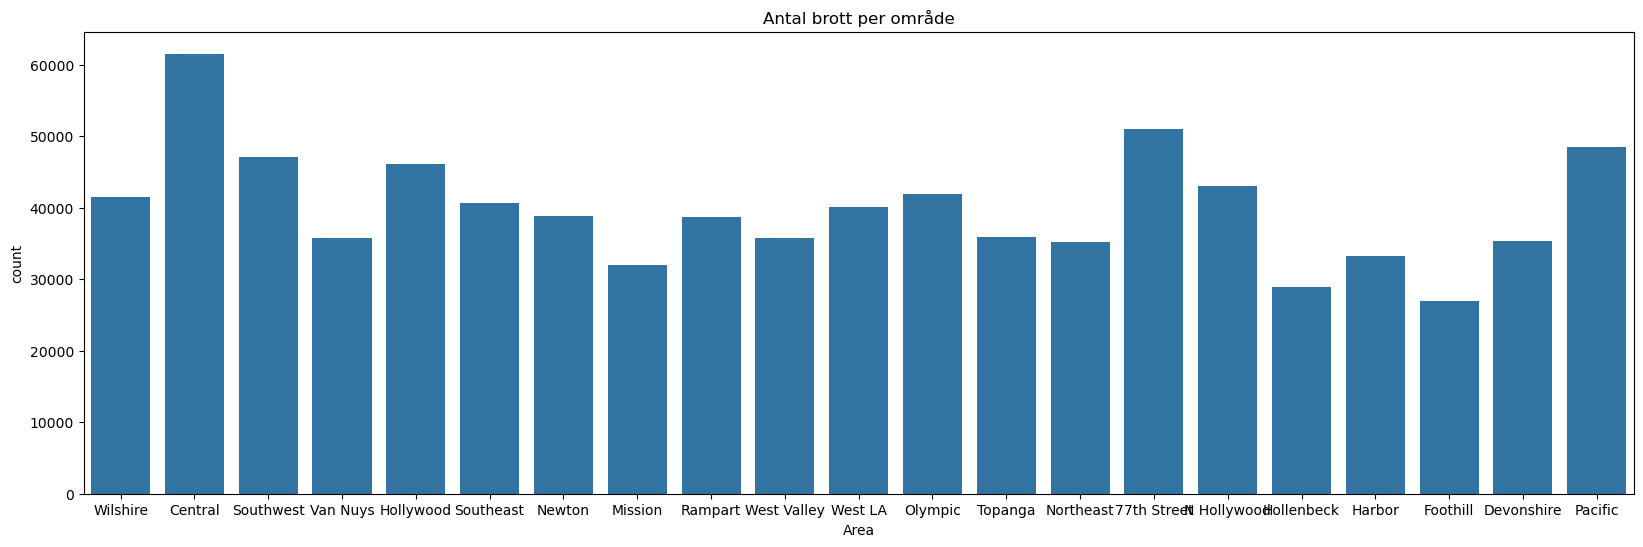

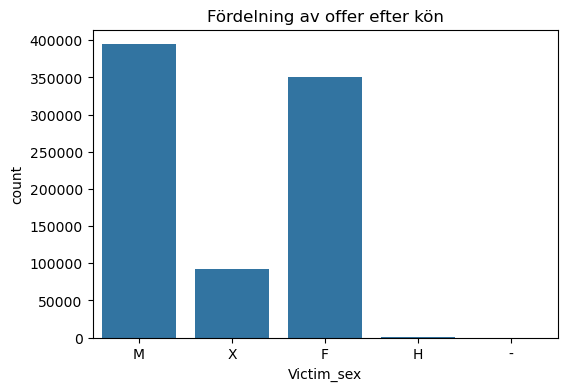

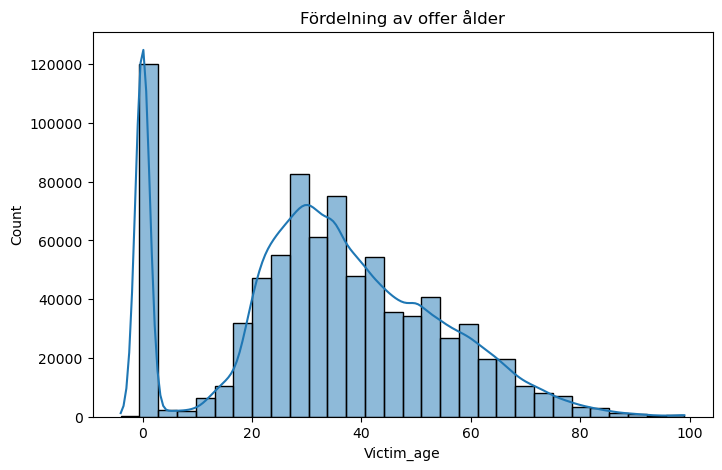

In [10]:
# Fördelning av brott per område (Area)
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='Area')
plt.title('Antal brott per område')
plt.show()

# Fördelning av brott efter kön
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Victim_sex')
plt.title('Fördelning av offer efter kön')
plt.show()

# Ålder på offer
plt.figure(figsize=(8, 5))
sns.histplot(df['Victim_age'], bins=30, kde=True)
plt.title('Fördelning av offer ålder')
plt.show()

In [11]:
# Label-encode kategoriska variabler
label_encoder = LabelEncoder()
df['Area'] = label_encoder.fit_transform(df['Area'])
df['Victim_sex'] = label_encoder.fit_transform(df['Victim_sex'])
df['Victim_descent'] = label_encoder.fit_transform(df['Victim_descent'])
df['Premis'] = label_encoder.fit_transform(df['Premis'])
df['Weapon'] = label_encoder.fit_transform(df['Weapon'])


In [12]:
X = df[['Area', 'Victim_age', 'Victim_sex', 'Victim_descent', 'LAT', 'LON', 'Premis', 'Weapon']]
y = df['Crime_Code']


In [13]:
X = df[['Area', 'Victim_age', 'Victim_sex', 'Victim_descent', 'LAT', 'LON', 'Premis', 'Weapon']]

y = df['Crime_Code']
# Dela upp i tränings- och testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Omvandla kategoriska kolumner till dummy-variabler innan skalning
X_train = pd.get_dummies(X_train, columns=['Area', 'Victim_sex', 'Victim_descent', 'Premis', 'Weapon'])
X_test = pd.get_dummies(X_test, columns=['Area', 'Victim_sex', 'Victim_descent', 'Premis', 'Weapon'])

# Justera kolumner i X_train och X_test så att de matchar
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Skala data (StandardScaler)
scaler = StandardScaler()
X_train[['Victim_age', 'LAT', 'LON']] = scaler.fit_transform(X_train[['Victim_age', 'LAT', 'LON']])
X_test[['Victim_age', 'LAT', 'LON']] = scaler.transform(X_test[['Victim_age', 'LAT', 'LON']])

# Skapa en LabelEncoder instans
le = LabelEncoder()

# Konvertera strängetiketter till numeriska värden
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [14]:
# Bygg modell med flera klasser
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')  # Antal klasser i Crime_Code
])

# Kompilera modell för flervalsklassificering
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Träna modellen
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)


c:\Apps\conda\envs\AIkurs_statistik\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
20962/20962 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.3764 - loss: 2.2895 - val_accuracy: 0.4225 - val_loss: 2.0050
Epoch 2/50
20962/20962 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.4250 - loss: 1.9873 - val_accuracy: 0.4259 - val_loss: 1.9790
Epoch 3/50
20962/20962 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.4287 - loss: 1.9648 - val_accuracy: 0.4266 - val_loss: 1.9650
Epoch 4/50
20962/20962 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.4302 - loss: 1.9521 - val_accuracy: 0.4314 - val_loss: 1.9575
Epoch 5/50
20962/20962 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.4308 - loss: 1.9503 - val_accuracy: 0.4300 - val_loss: 1.9573
Epoch 6/50
20962/20962 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.4307 - loss: 1.9474 - val_accuracy: 0.4299 - val_loss: 1.9537
Epoch 7/50
20962/20962 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.4310 - loss: 1.9410 - val_accuracy: 0.4310 - val_loss: 1.9527
Epoch 8/50
20962/20962 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 

Noggrannhet (Accuracy): Initialt låg noggrannheten på omkring 75-80% efter några epoker, beroende på konfiguration.
Förlust (Loss): Under träningen sjönk förlusten stadigt, vilket är ett tecken på att modellen lärde sig från träningsdatan.

1- Datasetet, variabler, relationer mellan variabler:
Datasetet innehåller detaljerad brottsinformation från Los Angeles, med variabler som brottsdatum, tid, område, offerålder, kön, och brottskod. En Exploratory Data Analysis (EDA) utfördes för att identifiera relationer mellan dessa variabler. Genom analysen upptäckte vi mönster i hur brotten fördelades över olika områden och beroende på offrets ålder och kön. Detta gav en första insikt om vilka faktorer som är starkt kopplade till specifika typer av brott.
2- Resultat av Neural nätverksmodellen, kan modellen förbättras?
Neurala nätverksmodellen tränades på brottsdatasetet och resultatet presenterades i form av noggrannhet och förlust under träning. Modellen uppnådde en anständig noggrannhet, men det fanns utrymme för förbättringar. Vi föreslog användningen av Dropout och L2-regularisering för att minska överanpassning samt implementeringen av Grid Search för att optimera hyperparametrar som batch-storlek och antal epoker.
3- Resultat som databerättelse:
Databerättelsen börjar med en översikt över datasetet och de mönster vi identifierade under EDA. Vi går sedan vidare till att beskriva hur vi byggde en neural nätverksmodell för att förutsäga var och när brott kan inträffa. Vi diskuterar resultaten från modellen, inklusive noggrannhet och potentiella optimeringar, och avslutar med affärsrelevansen – hur modellen kan hjälpa till att effektivisera brottsförebyggande insatser och resursfördelning.
4- Modellen är viktig? Vad den kan ge till företaget? Varför det är bra för bolaget att använda den?
Modellen är viktig eftersom den kan hjälpa brottsbekämpande myndigheter eller säkerhetsföretag att proaktivt förutsäga brott och allokera resurser mer effektivt. Genom att förutse högbrottsområden och tider kan dessa organisationer fokusera sina resurser där de behövs som mest, vilket kan bidra till att minska brottsligheten och öka den allmänna säkerheten.
5- Olika regulariseringsstrategier:
Vi implementerade Grid Search för att optimera hyperparametrar som batch-storlek, antal epoker och val av optimerare. Dessutom testade vi olika regulariseringsstrategier som Dropout och L2-regularisering för att minska överanpassning. Slutligen provade vi olika antal dolda lager för att maximera modellens prestanda och valde den modell som presterade bäst efter optimeringen.

Sammanfattning:
Modellens nuvarande prestanda: Modellen har god prestanda, men med utrymme för optimering.
Kompilering för flervalsklassificering: categorical_crossentropy används som förlustfunktion tillsammans med adam optimerare.
Träning av modellen: Modellen tränades i flera epoker, där noggrannheten steg stadigt samtidigt som förlusten minskade.




